In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.ensemble import IsolationForest

In [13]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [14]:
# Base model; without contamination.
clf = IsolationForest(n_estimators=100, random_state=16).fit(train_df)

In [15]:
predictions = clf.predict(train_df)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


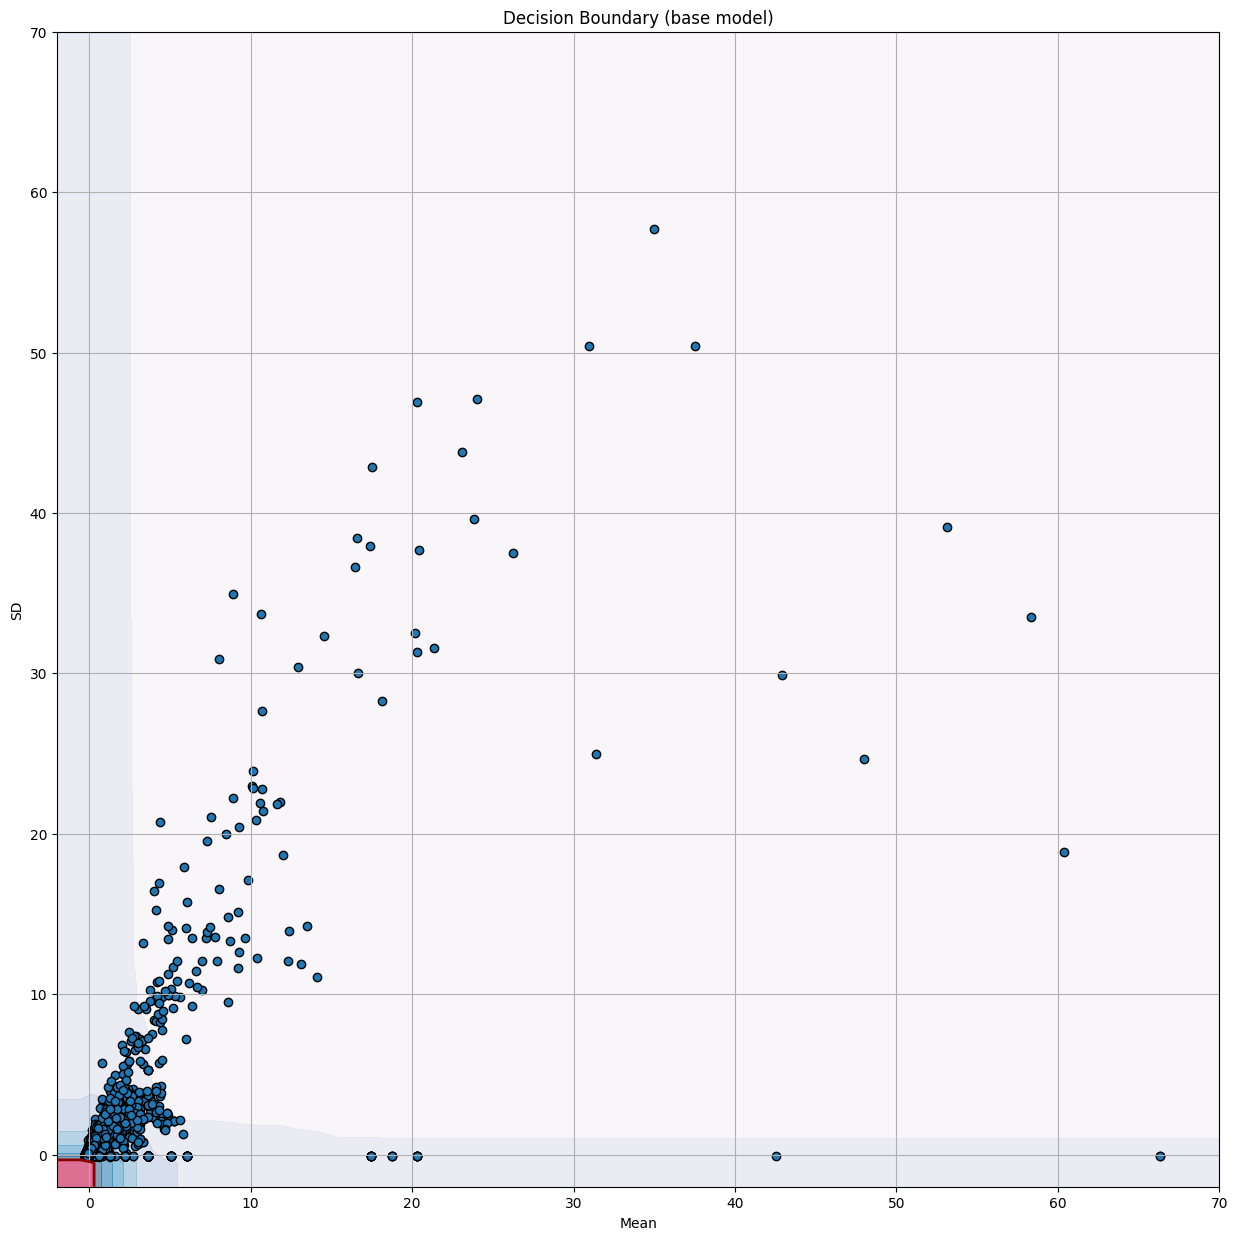

In [16]:
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draws the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draws the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draws the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_df.iloc[:, 0],
            train_df.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [17]:
# With contamination.
clf = IsolationForest(n_estimators=100, random_state=16,
                      contamination=0.001).fit(train_df)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/tmp/ipykernel_69/905585241.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_df.iloc[:, 0],


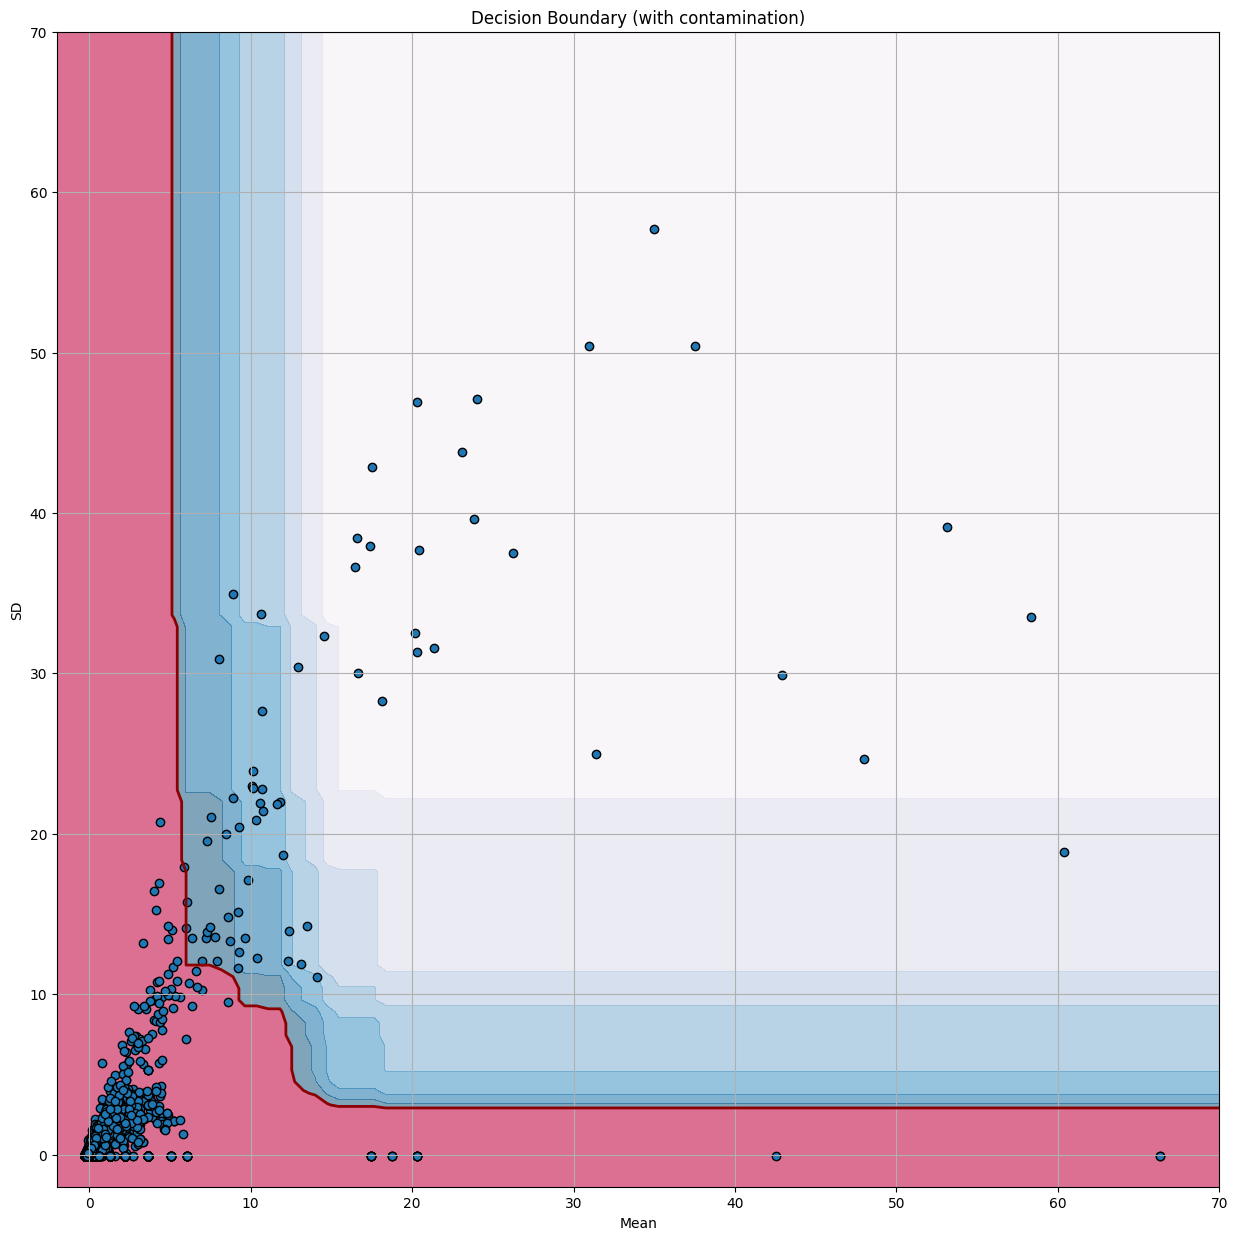

In [18]:
# Plot of the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_df.iloc[:, 0],
            train_df.iloc[:, 1],
            cmap=matplotlib.colors.ListedColormap(['blue', 'red']), edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [19]:
predictions = clf.predict(train_df)

In [20]:
df_predictions = pd.concat([train_df, pd.Series(predictions)], axis=1)
df_predictions.columns = ['mean', 'sd', 'output']

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


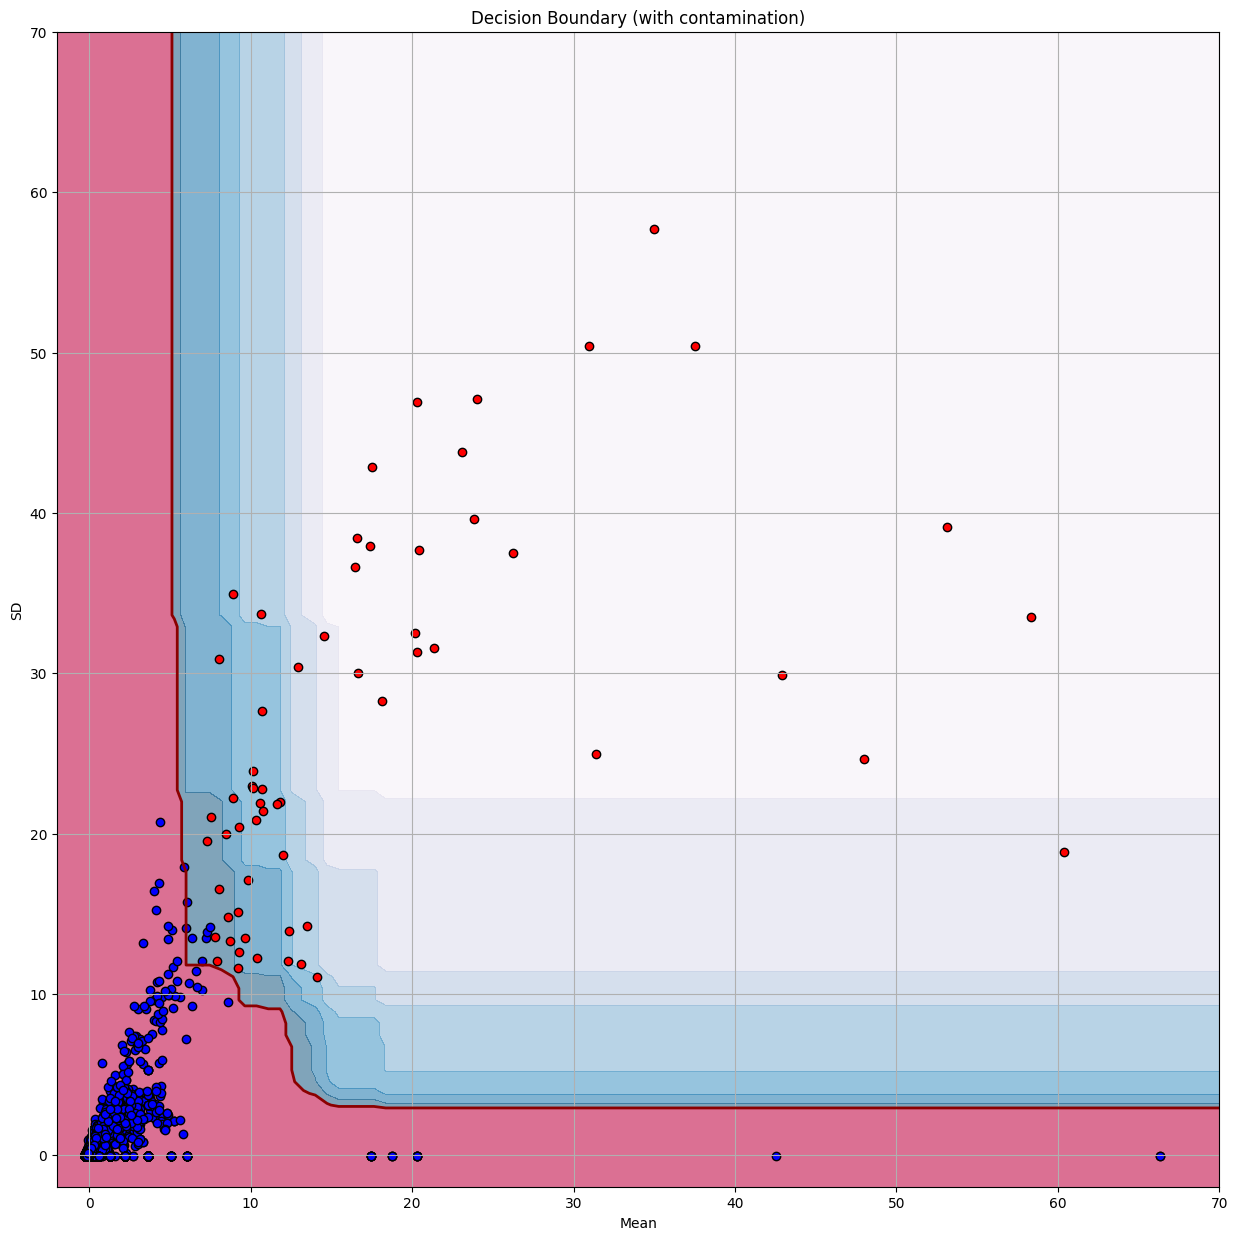

In [21]:
# Plot of the test dataset and the contamination model's decision frontier.
plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_predictions[df_predictions['output'] == 1].iloc[:, 0],
            df_predictions[df_predictions['output'] == 1].iloc[:, 1],
            c='blue', edgecolors='k')

plt.scatter(df_predictions[df_predictions['output'] == -1].iloc[:, 0],
            df_predictions[df_predictions['output'] == -1].iloc[:, 1],
            c='red', edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [22]:
# Export the model.
dump(clf, 'model.joblib')

['model.joblib']